# Correlation matrix
In this notebook, we create Figure S5 of the manuscript,
which shows posterior correlations between the parameters.
First, import some python modules

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv, sys, os
import scipy.stats as sts
import scipy
import scipy.cluster
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Change the font of $\LaTeX$ text in figures

In [2]:
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text', usetex=True)

### Import data
and make a list of parameters and $\LaTeX$ names

In [3]:
## make sure notebook works on MS Windows and unix-like OSs
filename = os.path.join("..", "output", "ganna_J3_wide-prior-alpha-gamma_DSD.csv")

with open(filename) as f:
    reader = csv.DictReader(f)
    posterior = [row for row in reader]
    
parkeys = ['r', 'beta_short_raw[1]', 'beta_short_raw[2]', 
           'inoculum', 'k', 'x0', 'alpha', 'zeta', 'gamma', 'epsilon']
parkeys += [f'nu_short[{i+1}]' for i in range(8)]
    
pretty_parnames = {
    'alpha' : "$\\alpha$",
    'gamma' : "$\\gamma$",
    'epsilon' : "$\\epsilon$",
    'beta_short_raw[1]' : "$\\beta_{[0,20)}$",
    'beta_short_raw[2]' : "$\\beta_{[20,60)}$", 
    'inoculum' : "$\\theta$", 
    'k' : "$K_1$", 
    'nu_short[1]' : "$\\nu_{[0,20)}$", 
    'nu_short[2]' : "$\\nu_{[20,30)}$", 
    'nu_short[3]' : "$\\nu_{[30,40)}$", 
    'nu_short[4]' : "$\\nu_{[40,50)}$", 
    'nu_short[5]' : "$\\nu_{[50,60)}$", 
    'nu_short[6]' : "$\\nu_{[60,70)}$", 
    'nu_short[7]' : "$\\nu_{[70,80)}$", 
    'nu_short[8]' : "$\\nu_{80+}$", 
    'r' : "$r$", 
    'x0' : "$t_1$", 
    'zeta' : "$\\zeta_1$"
}

### Compute posterior correlation matrix

In [4]:
n = len(parkeys)
corrmat = np.zeros((n,n))

for i1 in range(n):
    k1 = parkeys[i1]
    x1s = [sam[k1] for sam in posterior]
    for i2 in range(n):
        k2 = parkeys[i2]
        x2s = [sam[k2] for sam in posterior]        
        rho, pval = sts.spearmanr(x1s, x2s)
        corrmat[i1, i2] = rho


### Make the figure

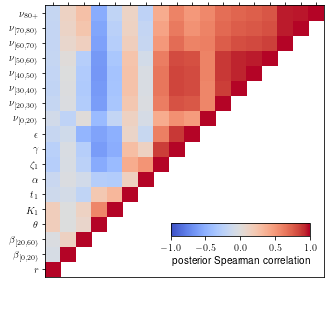

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

## don't plot lower triangle which is redundant
mask = np.array([[i>j for i in range(n)] for j in range(n)])
corrmat_masked = np.ma.masked_array(corrmat, mask=mask)

C = ax.pcolormesh(corrmat_masked, vmin=-1, vmax=1, cmap="coolwarm", rasterized=False)

cx = ax.inset_axes([0.45, 0.15, 0.5, 0.05])
#cx = inset_axes(ax, width='50%', height='5%', loc='lower right')
fig.colorbar(C, cax=cx, orientation='horizontal')

cx.set_xlabel("posterior Spearman correlation")

pos = range(n)
ticks = [i + 0.5 for i in pos]
tick_labels = [pretty_parnames[parkeys[i]] for i in pos]

ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels, rotation=90)

ax.xaxis.tick_top()

ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)

figure_filename = os.path.join("..", "figures", "FigS5.pdf")

fig.savefig(figure_filename, bbox_inches='tight')